In [99]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import statsmodels.api as sm
%matplotlib inline

In [100]:
dataset = pd.read_csv(r'C:\Users\ameli\Downloads\Ina_New.csv')

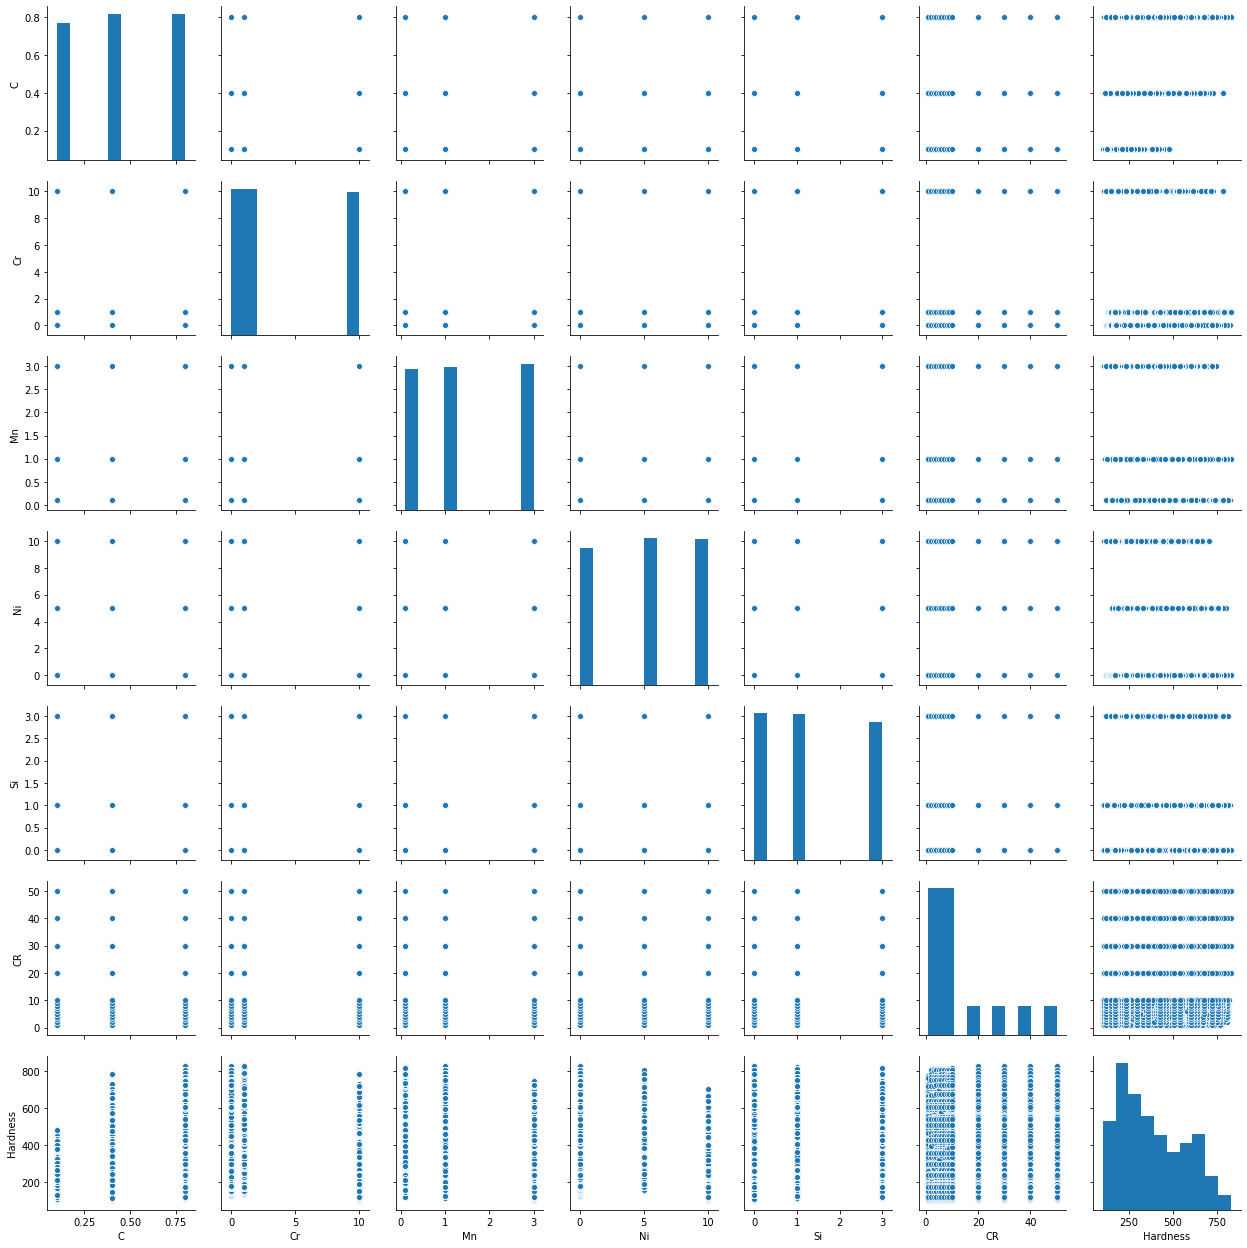

In [101]:
sns.pairplot(dataset)

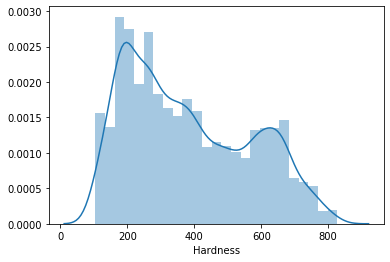

In [102]:
sns.distplot(dataset['Hardness']);

In [103]:
dataset.corr()

,C,Cr,Mn,Ni,Si,CR,Hardness
C,1.00,0.01,-0.02,-0.04,0.03,0.00,0.21
Cr,0.01,1.00,0.00,0.01,-0.01,0.00,-0.33
Mn,-0.02,0.00,1.00,-0.02,0.02,0.00,-0.30
Ni,-0.04,0.01,-0.02,1.00,0.03,0.00,-0.28
Si,0.03,-0.01,0.02,0.03,1.00,-0.00,-0.16
CR,0.00,0.00,0.00,0.00,-0.00,1.00,0.07
Hardness,0.21,-0.33,-0.30,-0.28,-0.16,0.07,1.00


In [104]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9968 entries, 0 to 9967
Data columns (total 7 columns):
C           9968 non-null float64
Cr          9968 non-null int64
Mn          9968 non-null float64
Ni          9968 non-null int64
Si          9968 non-null int64
CR          9968 non-null int64
Hardness    9968 non-null float64
dtypes: float64(3), int64(4)
memory usage: 545.2 KB


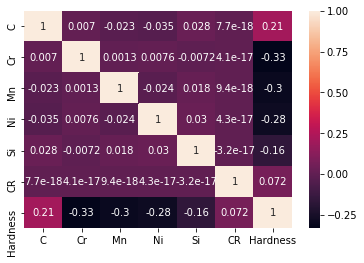

In [105]:
sns.heatmap(dataset.corr(),annot=True)

In [106]:
dataset.describe()

,C,Cr,Mn,Ni,Si,CR,Hardness
count,9968.00,9968.00,9968.00,9968.00,9968.00,9968.00,9968.00
mean,0.44,3.62,1.39,5.11,1.30,13.93,381.45
std,0.29,4.48,1.22,4.06,1.24,14.81,184.12
min,0.10,0.00,0.10,0.00,0.00,1.00,104.02
25%,0.10,0.00,0.10,0.00,0.00,4.00,220.01
50%,0.40,1.00,1.00,5.00,1.00,7.50,342.80
75%,0.80,10.00,3.00,10.00,3.00,20.00,537.51
max,0.80,10.00,3.00,10.00,3.00,50.00,827.95


In [107]:
dataset.shape

(9968, 7)

In [108]:
dataset.isnull().any()

C           False
Cr          False
Mn          False
Ni          False
Si          False
CR          False
Hardness    False
dtype: bool

In [109]:
X = dataset[['C', 'Cr', 'Mn', 'Ni', 'Si', 'CR']].values
y = dataset['Hardness'].values

In [110]:
plt.figure(figsize=(15,10))
plt.tight_layout()
#seabornInstance.distplot(dataset['quality'])

<Figure size 1080x720 with 0 Axes>

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training the Simple Linear Regression model on the Training set

In [112]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [113]:
#Print out the coefficients of the model
print('Coefficients: \n', regressor.coef_)

Coefficients: 
 [129.17480609 -13.72103051 -45.53206885 -12.52632109 -23.15120276
   0.78074838]


In [114]:
y_pred = regressor.predict(X_train)

Text(0, 0.5, 'Predicted Y')

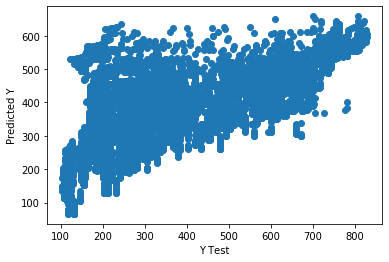

In [115]:
plt.scatter(y_train,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Text(0.5, 1.0, 'Residuals PDF')

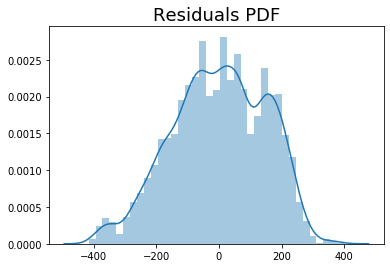

In [116]:
sns.distplot(y_train - y_pred)

# Include a title
plt.title("Residuals PDF", size=18)

In [117]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

Mean Absolute Error: 122.04780726029387
Mean Squared Error: 21961.798729262475
Root Mean Squared Error: 148.1951373333905


In [118]:
# Find the R-squared of the model
regressor.score(X_train,y_train)

0.35001581765488554

In [119]:
regressor.intercept_

520.6906284849083

In [120]:

regressor.coef_

array([129.17480609, -13.72103051, -45.53206885, -12.52632109,
       -23.15120276,   0.78074838])

In [121]:
r2_score(y_train,y_pred)

0.35001581765488554

# Testing

In [122]:
# Once we have trained and fine-tuned our model, we can proceed to testing it
# Testing is done on a dataset that the algorithm has never seen
# Luckily we have prepared such a dataset
# Our test inputs are 'x_test', while the outputs: 'y_test' 
# We SHOULD NOT TRAIN THE MODEL ON THEM, we just feed them and find the predictions
# If the predictions are far off, we will know that our model overfitted
y_pred_test = regressor.predict(X_test)

Text(0, 0.5, 'Predicted Y')

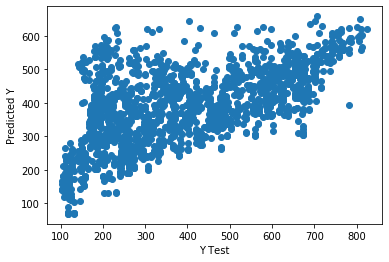

In [123]:
plt.scatter(y_test,y_pred_test)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [124]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_pf = pd.DataFrame(y_pred_test, columns=['Prediction'])
df_pf.head()

,Prediction
0,418.71
1,357.80
2,360.03
3,513.25
4,363.08


In [125]:
# We can also include the test targets in that data frame (so we can manually compare them)
df_pf['Target'] = y_test
df_pf


,Prediction,Target
0,418.71,178.19
1,357.80,402.11
2,360.03,173.74
3,513.25,675.65
4,363.08,400.74
5,315.97,601.21
6,443.32,209.30
7,192.48,240.06
8,295.17,419.41
9,471.22,674.73


In [126]:
# Additionally, we can calculate the difference between the targets and the predictions
# Note that this is actually the residual (we already plotted the residuals)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

# Since OLS is basically an algorithm which minimizes the total sum of squared errors (residuals),
# this comparison makes a lot of sense

In [127]:
# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,418.71,178.19,-240.52,134.98
1,357.80,402.11,44.31,11.02
2,360.03,173.74,-186.30,107.23
3,513.25,675.65,162.40,24.04
4,363.08,400.74,37.65,9.40
5,315.97,601.21,285.24,47.44
6,443.32,209.30,-234.03,111.81
7,192.48,240.06,47.58,19.82
8,295.17,419.41,124.24,29.62
9,471.22,674.73,203.51,30.16


In [128]:
# Exploring the descriptives here gives us additional insights
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,1994.00,1994.00,1994.00,1994.00
mean,384.06,383.08,-0.97,40.96
std,110.71,185.32,149.55,42.20
min,68.21,104.02,-396.18,0.02
25%,305.57,220.50,-102.56,14.74
50%,386.30,346.28,5.88,27.10
75%,466.88,547.33,119.54,47.88
max,658.51,823.67,389.41,265.75


In [129]:
# Sometimes it is useful to check these outputs manually
# To see all rows, we use the relevant pandas syntax
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
1346,387.15,387.23,0.07,0.02
1725,283.54,283.60,0.06,0.02
1163,404.29,404.72,0.43,0.11
749,405.69,406.14,0.45,0.11
257,462.03,462.62,0.59,0.13
610,244.17,243.76,-0.41,0.17
1611,266.00,265.38,-0.62,0.24
819,512.75,514.09,1.34,0.26
687,299.61,300.83,1.22,0.41
1115,259.09,260.17,1.07,0.41


In [130]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

Mean Absolute Error: 122.19974115652252
Mean Squared Error: 22354.070636188582
Root Mean Squared Error: 149.51277750141819


In [131]:
regressor.score(X_test,y_test)

0.34876390937157176

In [132]:
model = sm.OLS(y_test,X_test)
results = model.fit()
results_summary = results.summary()

In [133]:
results_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.709
Model:                            OLS   Adj. R-squared (uncentered):              0.708
Method:                 Least Squares   F-statistic:                              808.5
Date:                Thu, 14 May 2020   Prob (F-statistic):                        0.00
Time:                        21:08:08   Log-Likelihood:                         -13668.
No. Observations:                1994   AIC:                                  2.735e+04
Df Residuals:                    1988   BIC:                                  2.738e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           447.0450     14.956     29.890      0.000     417.713     476.377
x2            -2.9011      1.102     -2.632      0.009      -5.062      -0.740
x3            12.1053      3.907      3.098      0.002       4.443      19.768
x4             4.6141      1.165      3.959      0.000       2.328       6.900
x5            19.4007      4.028      4.816      0.000      11.501      27.300
x6             4.8763      0.330     14.788      0.000       4.230       5.523
==============================================================================
Omnibus:                      119.420   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.749
Skew:                          -0.418   Prob(JB):                     5.35e-20
Kurtosis:                       2.394   Cond. No.                         61.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Residuals PDF')

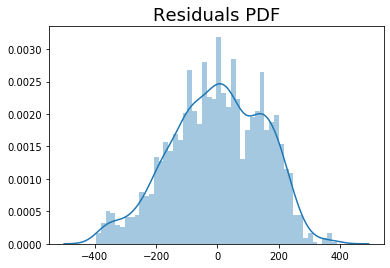

In [134]:
sns.distplot((y_test-y_pred_test),bins=50);
plt.title("Residuals PDF", size=18)

In [135]:
#y_test_df = pd.DataFrame(y_test)
#y_pred_df = pd.DataFrame(y_pred)
#df = pd.DataFrame( y_test_df, y_pred_df)
#df1 = df.head(25)

In [136]:
x_df = pd.DataFrame(X)
coefficients = pd.DataFrame(regressor.coef_,x_df.columns)
coefficients.columns = ['Coefficient']
coefficients

,Coefficient
0,129.17
1,-13.72
2,-45.53
3,-12.53
4,-23.15
5,0.78


In [137]:
print('intercept:', regressor.intercept_)

intercept: 520.6906284849083
